# Springboard Take Home Challenge 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
df = pd.read_json(r'logins.json') #load in data file

In [3]:
df.head() #check what we are working with

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.describe() #describe data. no missing values

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
#set index to login time, resample to 15min and count. reset index after

index_df = df.set_index(['login_time'])

index_df['count'] = 1

index_df_15 = index_df.resample('15min').count().reset_index()

In [7]:
index_df_15.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [8]:
index_df_15.max() #checking to see what the max login date was

login_time    1970-04-13 18:45:00
count                          73
dtype: object

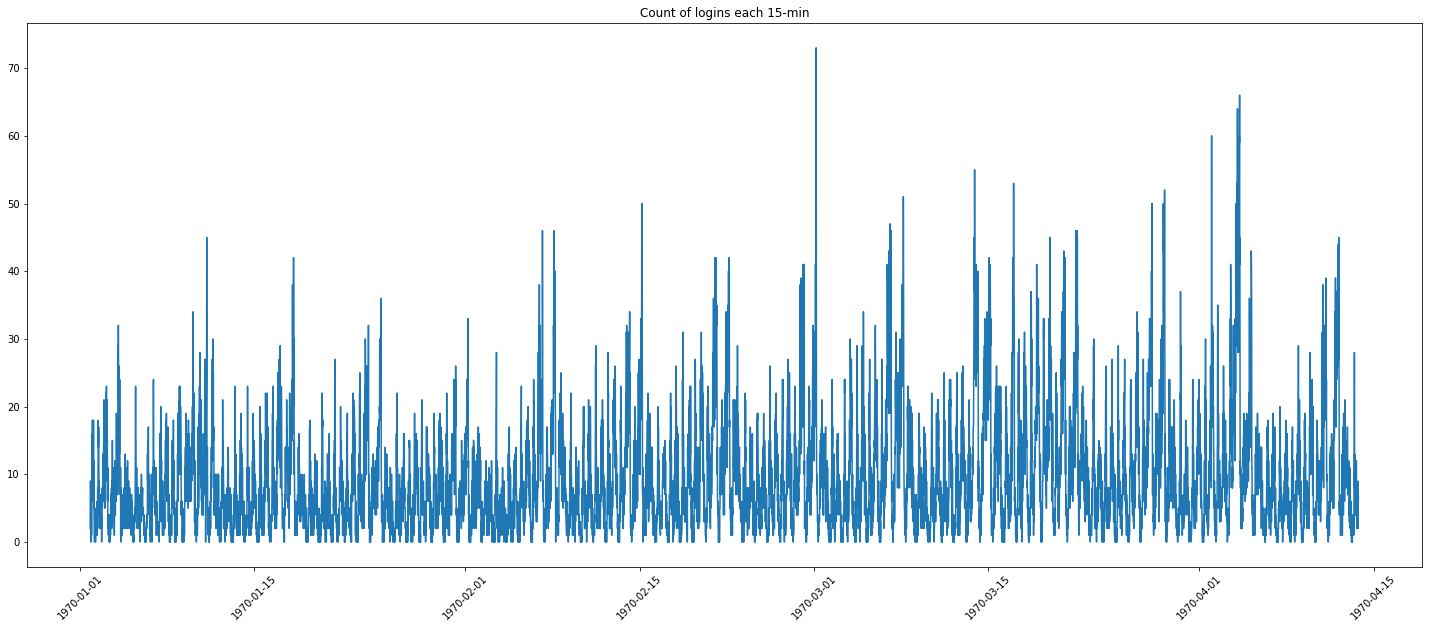

In [12]:
x = index_df_15['login_time']
y = index_df_15['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min')
plt.xticks(rotation=45);

### there is a increase in growth over the few months starting from january with many spikes of activity. 


### Next we will look at monthly and weekly rates

In [18]:
Jan = index_df_15[(index_df_15.login_time > '1970-01') & (index_df_15.login_time < '1970-02')]

Feb = index_df_15[(index_df_15.login_time > '1970-02') & (index_df_15.login_time < '1970-03')]

Mar = index_df_15[(index_df_15.login_time > '1970-03') & (index_df_15.login_time < '1970-04')]

Apr = index_df_15[(index_df_15.login_time > '1970-04') & (index_df_15.login_time < '1970-05')]

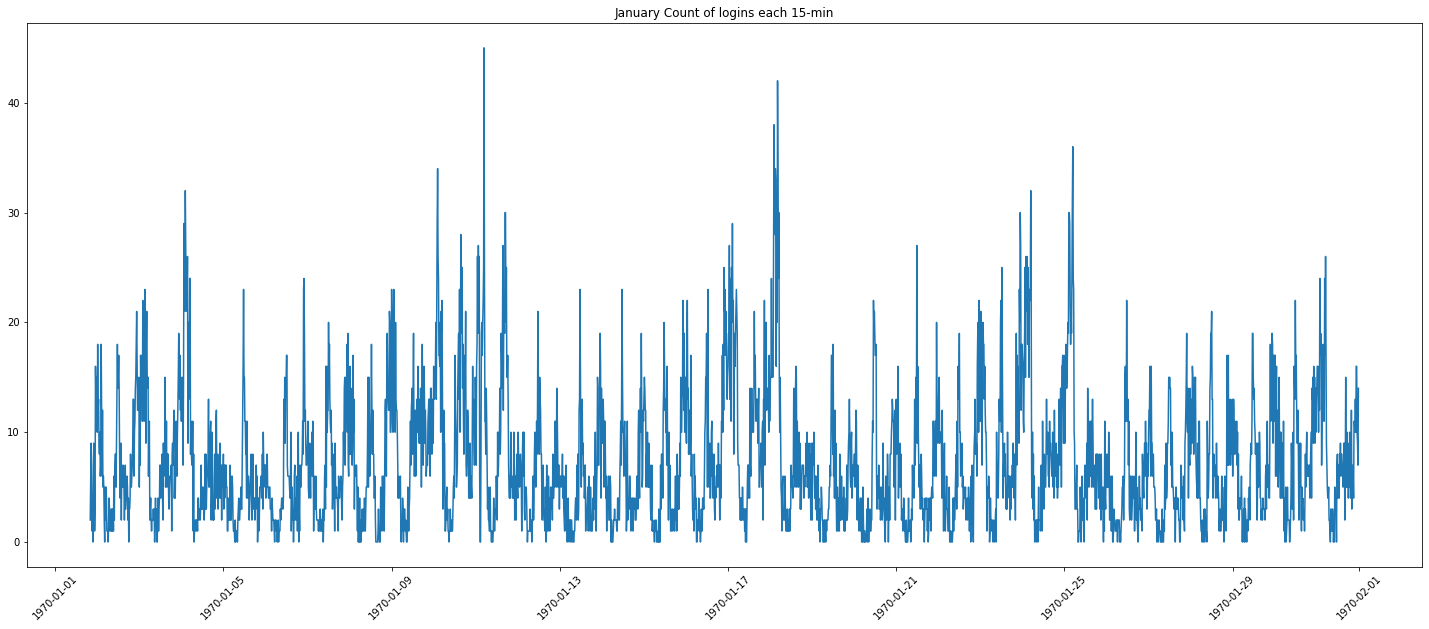

In [19]:
x = Jan['login_time']
y = Jan['count']
plt.plot(x, y)
plt.title('January Count of logins each 15-min')
plt.xticks(rotation=45);

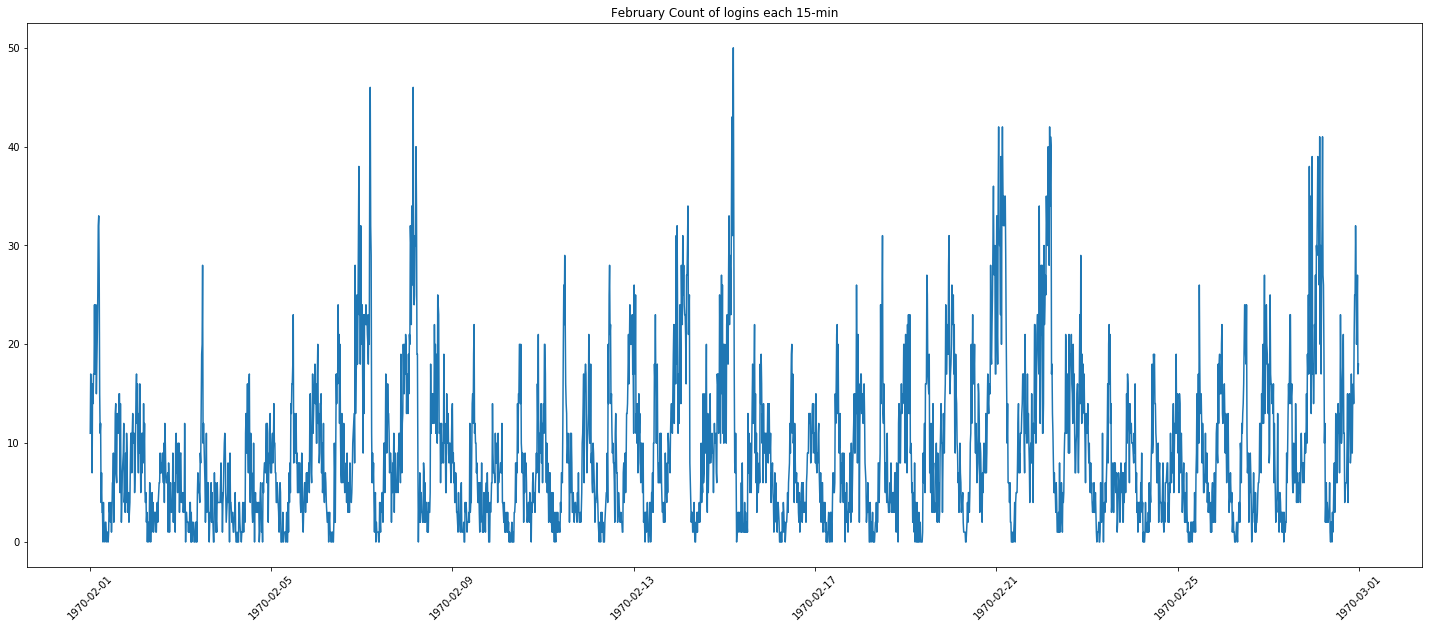

In [20]:
x = Feb['login_time']
y = Feb['count']
plt.plot(x, y)
plt.title('February Count of logins each 15-min')
plt.xticks(rotation=45);

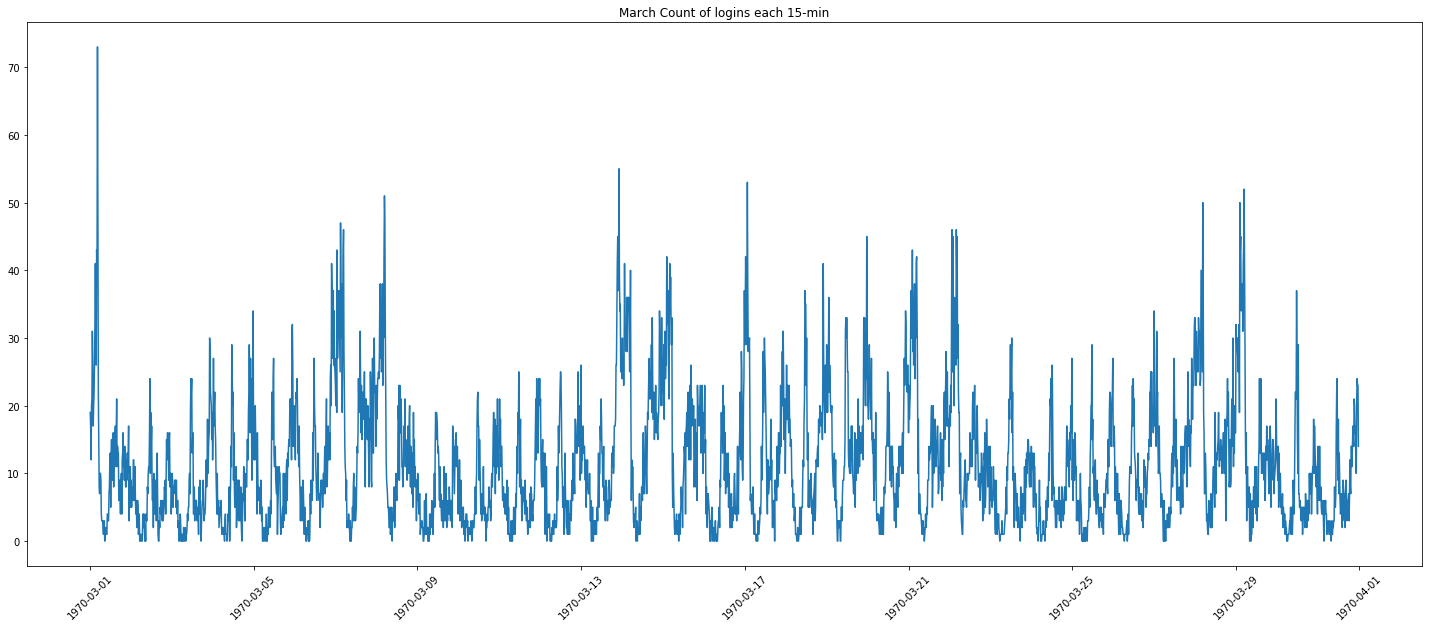

In [21]:
x = Mar['login_time']
y = Mar['count']
plt.plot(x, y)
plt.title('March Count of logins each 15-min')
plt.xticks(rotation=45);

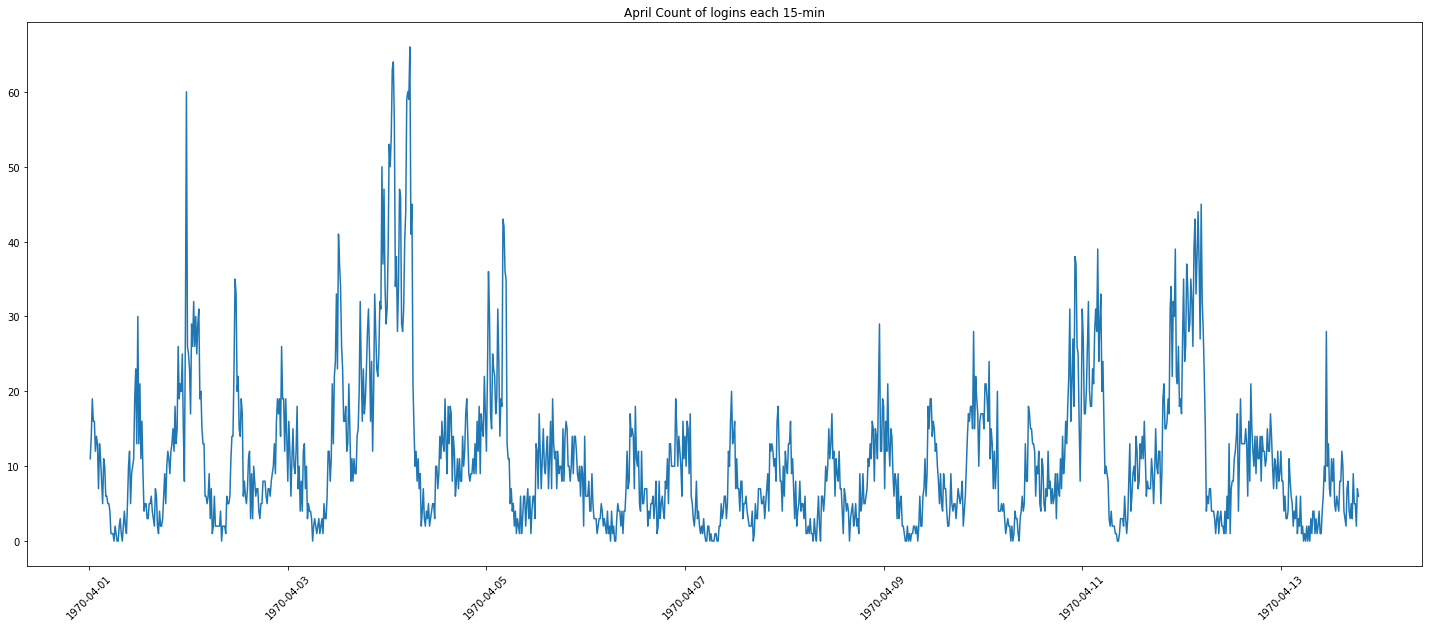

In [22]:
x = Apr['login_time']
y = Apr['count']
plt.plot(x, y)
plt.title('April Count of logins each 15-min')
plt.xticks(rotation=45);

### Not much to gather from this from what I can tell. Looking into weekly login count might help seeing trends 

In [16]:
#index is based on the day 

index_df_15['weekday'] = index_df_15['login_time'].dt.dayofweek
weekday = index_df_15.sort_values(by='count', ascending=False)
weekday_counts = weekday[['count', 'weekday']]
weekday_count = weekday_counts.groupby('weekday').sum().reset_index()

#change count to weekday name
weekday_count['weekday'] = ['Mon', 'Tues', 'Wed','Thurs','Fri', 'Sat', 'Sun']
weekday_count = weekday_count[['weekday', 'count']]

In [17]:
weekday_count

,weekday,count
0,Mon,8823
1,Tues,9268
2,Wed,10339
3,Thurs,11960
4,Fri,15208
5,Sat,19377
6,Sun,18167


## This tells us that logins increase as it gets closer to the weekend and the most logins occur during the weekend. 

## Lets visualize this data for a better perspective 

Text(0.5, 1.0, 'Count of logins vs. Weekday for 3.5 Months')

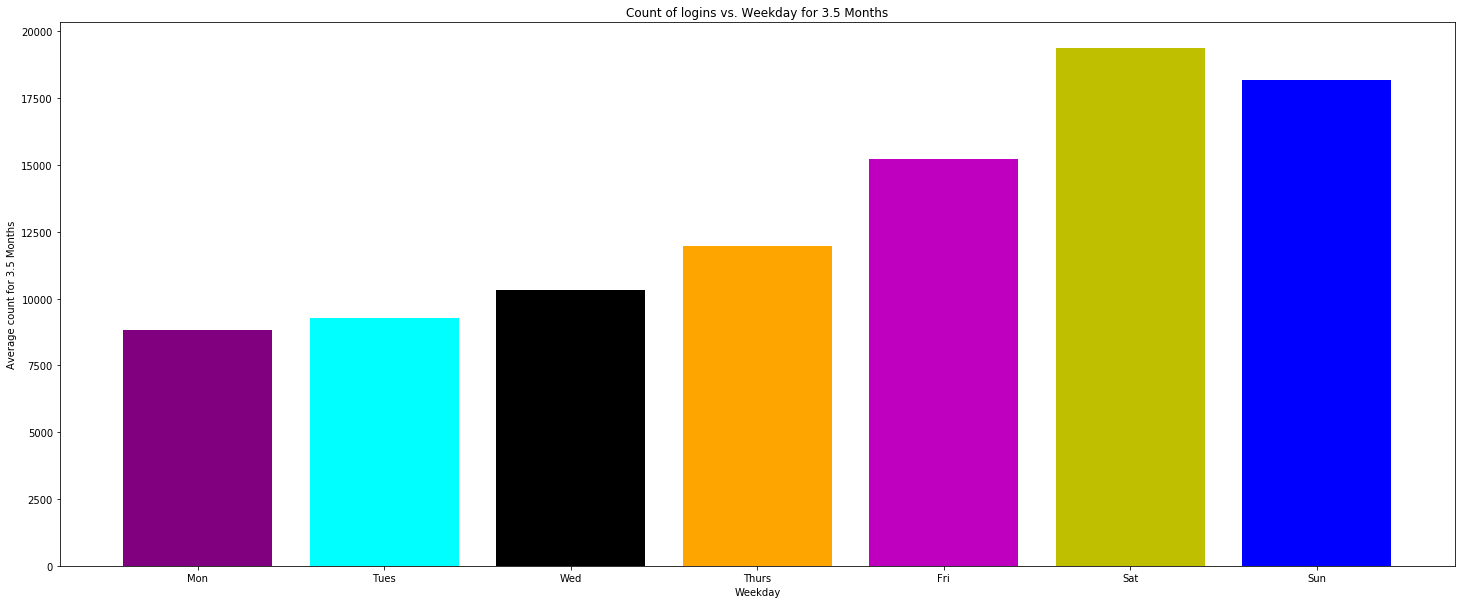

In [174]:
color = ('purple', 'cyan', 'black','orange','m','y','blue') #avoid rgb for those that are colorblind
plt.bar(x=weekday_count['weekday'], height=weekday_count['count'],color=color)
plt.ylabel('Average count for 3.5 Months')
plt.xlabel('Weekday')
plt.title('Count of logins vs. Weekday for 3.5 Months')

In [26]:
## Lets take a look at logins over averaged over 24 hours 

# split into hours 
index_df_15['hour'] = index_df_15['login_time'].dt.hour
hours = index_df_15
hour = hours[['count', 'hour']]
hour = hour.groupby('hour').sum().reset_index()
hour

,hour,count
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034
5,5,2945
6,6,1138
7,7,815
8,8,818
9,9,1527


Text(0.5, 1.0, 'Average count of logins vs. Hour of day ')

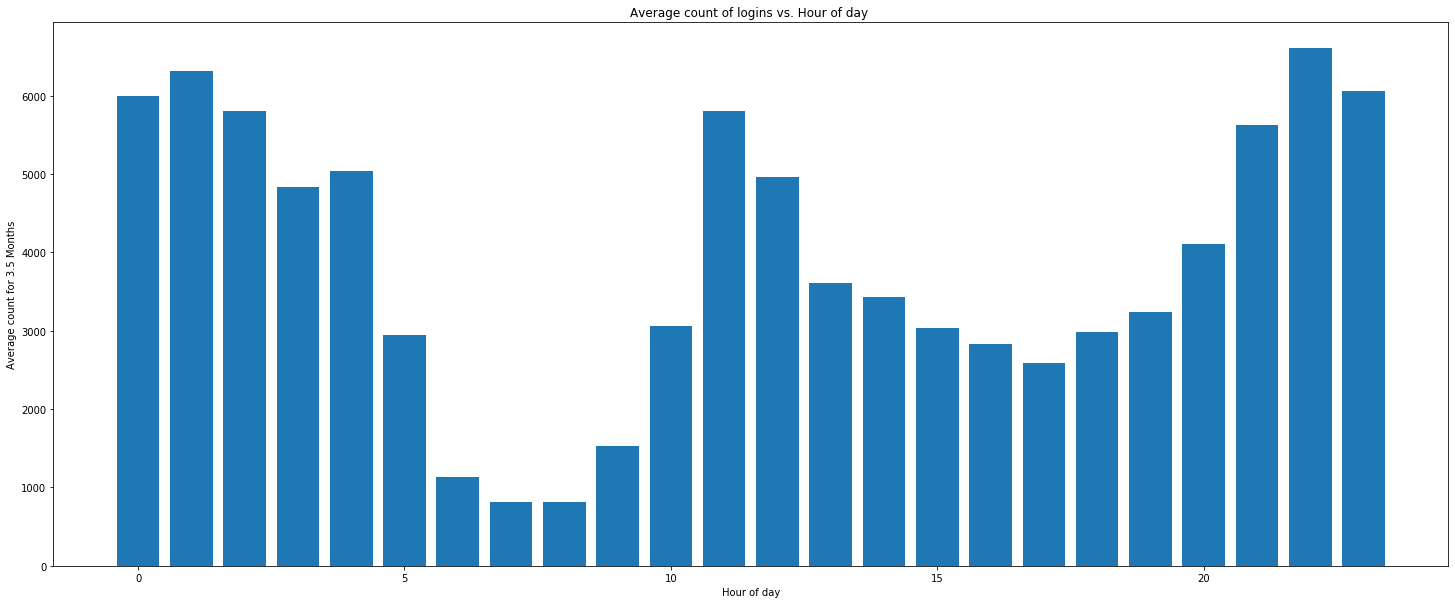

In [28]:
# lets visualize average count of logins 
plt.bar(x=hour['hour'], height=hour['count'])
plt.ylabel('Average count for 3.5 Months')
plt.xlabel('Hour of day')
plt.title('Average count of logins vs. Hour of day ')

## We can see a large dip as the day begins then a increase at around noon. Then another increase in the evening 



# So Far we have learned that logins increase during the weekend and that during the day the average logins increase during noon and in the evening

# Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

b. what statistical test(s) you will conduct to verify the significance of the observation

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

A) For this experiment I would implement an A/B test. So at random, drivers would have their toll costs reimbursed and for others it would not. Comparing profits between the time period used for this test vs last years profits would be a good comparison. Also can compare the amount of drivers crossing the bridge during the test vs last year to see if there was an increase in ridership. 

B) After getting the results, a t-test to test for significance (p = 0.05) between each group.

C) If a profit was made, then reimbursing the toll costs proved to be the right idea. If a decrease in profit was seen then this was not the right idea. If there was no increase or decrease then it might be a good idea to keep the service in tact for the riders who enjoy not paying tolls. We can assume that an increase in profit means an increase in ridership and vice versa 

# Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).

In [61]:
import json   
#open this file using json and then pandas. previous method causes error
file = open('ultimate_data_challenge.json', 'r') 
df = pd.DataFrame(json.load(file))
file.close()

In [62]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [63]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## We have missing values in the data. Replacing these with the mean. 

In [65]:
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

In [66]:
df.info() #this got rid of missing values! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [67]:
trips_city = (df[['trips_in_first_30_days', 'city', 'phone']].groupby('city').sum().reset_index())
trips_city

,city,trips_in_first_30_days
0,Astapor,32219
1,King's Landing,24957
2,Winterfell,56734


Text(0.5, 1.0, 'Trips vs. City')

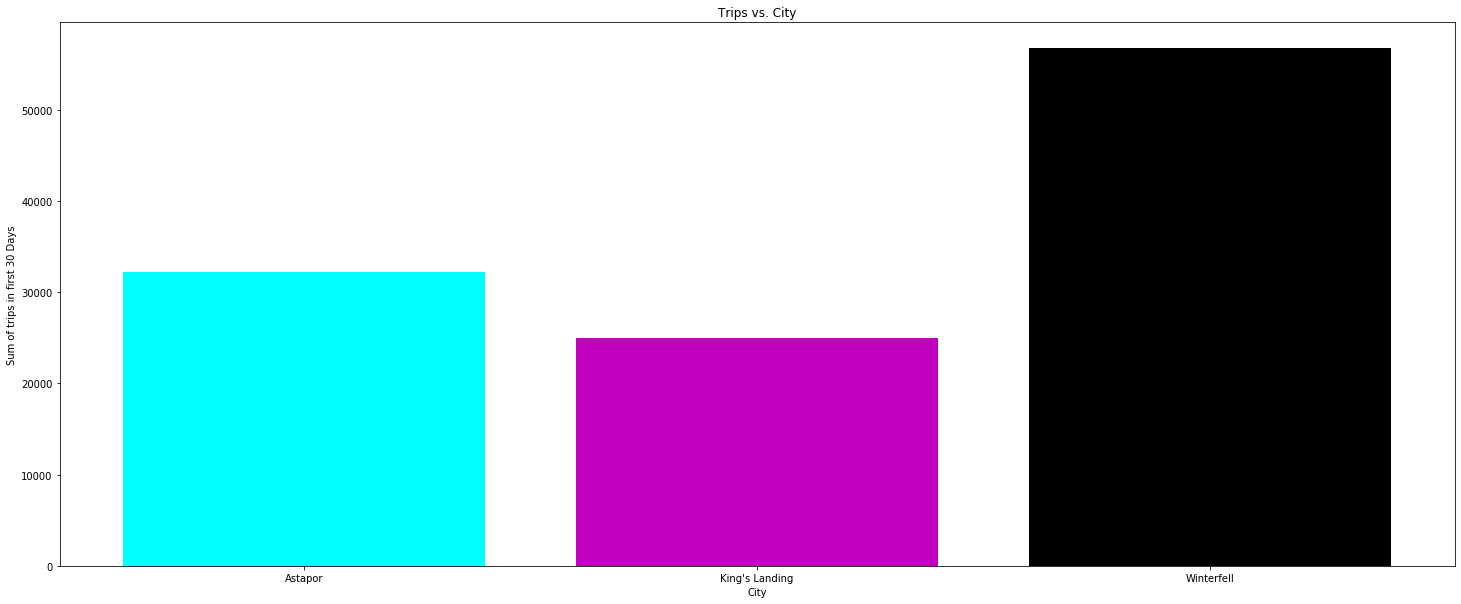

In [175]:
color = ('cyan','m','k')
plt.bar(x=trips_city['city'], height=trips_city['trips_in_first_30_days'],color=color)
plt.ylabel('Sum of trips in first 30 Days')
plt.xlabel('City')
plt.title('Trips vs. City')

In [69]:
trips_phone= df[['trips_in_first_30_days', 'city', 'phone']].groupby('phone').sum().reset_index()
trips_phone

,phone,trips_in_first_30_days
0,Android,29067
1,iPhone,84843


Text(0.5, 1.0, 'Andriod vs Iphone user trips')

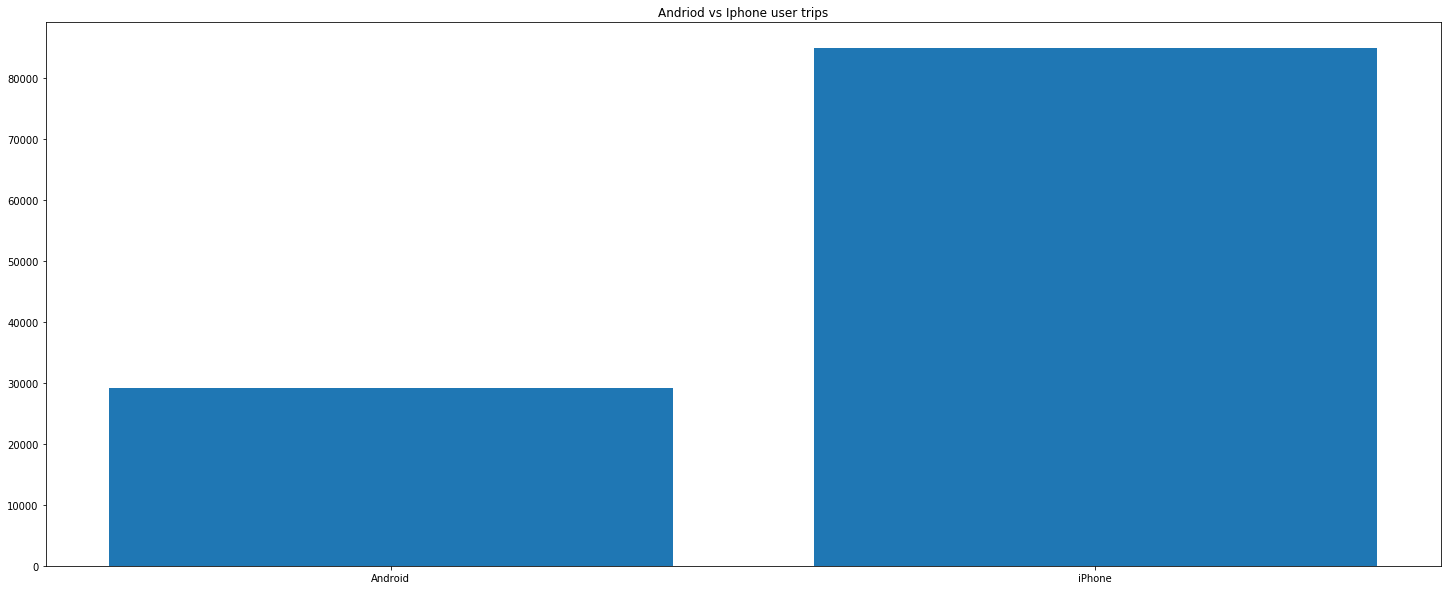

In [70]:
plt.bar(x=trips_phone['phone'], height=trips_phone['trips_in_first_30_days'])
plt.title('Andriod vs Iphone user trips')

## Next we need to determine whether or not a user will be active in their 6th month on the system. To do this we will add a column that gives a binary value to users who have taken a trip in the 6 months

In [71]:
df[['last_trip_date']].max()  #last date in the data

last_trip_date    2014-07-01
dtype: object

In [72]:
len(df[df['last_trip_date'] >= '2014-06-01']) #active useres

18804

In [73]:
len(df[df['last_trip_date'] < '2014-06-01']) #non active users

31196

In [74]:
#create binary values. retained column 

df['Active'] = np.nan
df.loc[df['last_trip_date'] >= '2014-06-01', 'Active'] = 1
df.loc[df['last_trip_date'] < '2014-06-01', 'Active'] = 0
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,Active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0.0


In [78]:
df['Active'].sum()/len(df)  #the percentage of active users 

0.37608

# Lets create our model

In [79]:
y = df['Active'].values

In [80]:
df.drop('last_trip_date', axis=1, inplace=True)
df.drop('signup_date', axis=1, inplace=True)
df = df.drop('Active', axis=1)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,Android,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,Android,11.8,14,False,82.4


In [81]:
#something new I found was get_dummies which converts categorical variable into dummy/indicator variables!
#really useful 

df_encoded = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user']) 
df_encoded.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,0,1,1,0,1,0


In [82]:

X = df_encoded.values

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Using the Decision Tree Classifier model first 

In [167]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
DTC_pred = dtc.predict(X_test)
score = dtc.score(X_test, y_test)
print(score)

0.717


In [169]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, DTC_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.78      0.78      6251
         1.0       0.63      0.61      0.62      3749

    accuracy                           0.72     10000
   macro avg       0.70      0.69      0.70     10000
weighted avg       0.72      0.72      0.72     10000



In [171]:
cm_dtc = confusion_matrix(y_test, DTC_pred)

print(cm_dtc)

[[4898 1353]
 [1477 2272]]


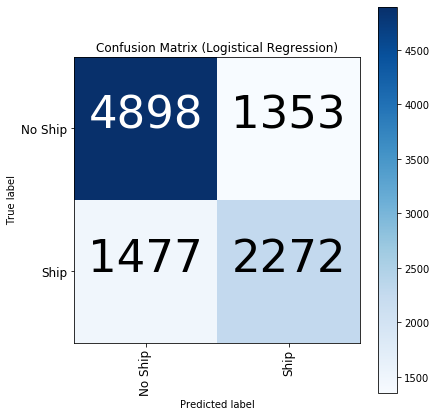

In [173]:
from itertools import *
#confusion matrix plot
def plot_confusion_matrix(y_test,DTC_pred, classes,
                          normalize=False,
                          title='Confusion Matrix (Logistical Regression)',
                          cmap=plt.cm.Blues):
   
    plt.figure(figsize = (6,6))
    plt.imshow(cm_dtc, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90,size = 12)
    plt.yticks(tick_marks, classes,size = 12)
    plt.ylim([1.5, -.5])
    
    thresh = cm_dtc.max() / 2.
    
    
    for i in range (cm_dtc.shape[0]):
        for j in range (cm_dtc.shape[1]):
            
            plt.text(j, i, cm_dtc[i, j],fontsize=45,
                 horizontalalignment="center",
                 color="white" if cm_dtc[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
dict_characters = {0: 'No Ship', 1: 'Ship'}    
plot_confusion_matrix(y_test,DTC_pred, classes = list(dict_characters.values())) 
plt.show()

In [151]:
feature_importances = dtc.feature_importances_.tolist()
print(feature_importances)

[0.30683760152469997, 0.17570185910531477, 0.08488914175568069, 0.04448677478916351, 0.06363444797748052, 0.06748334562959572, 0.1122240918479411, 0.01221805314669474, 0.06434122796041686, 0.00633234188142197, 0.009227488429627943, 0.027116455633089752, 0.010804211914029195, 0.014702958404843165]


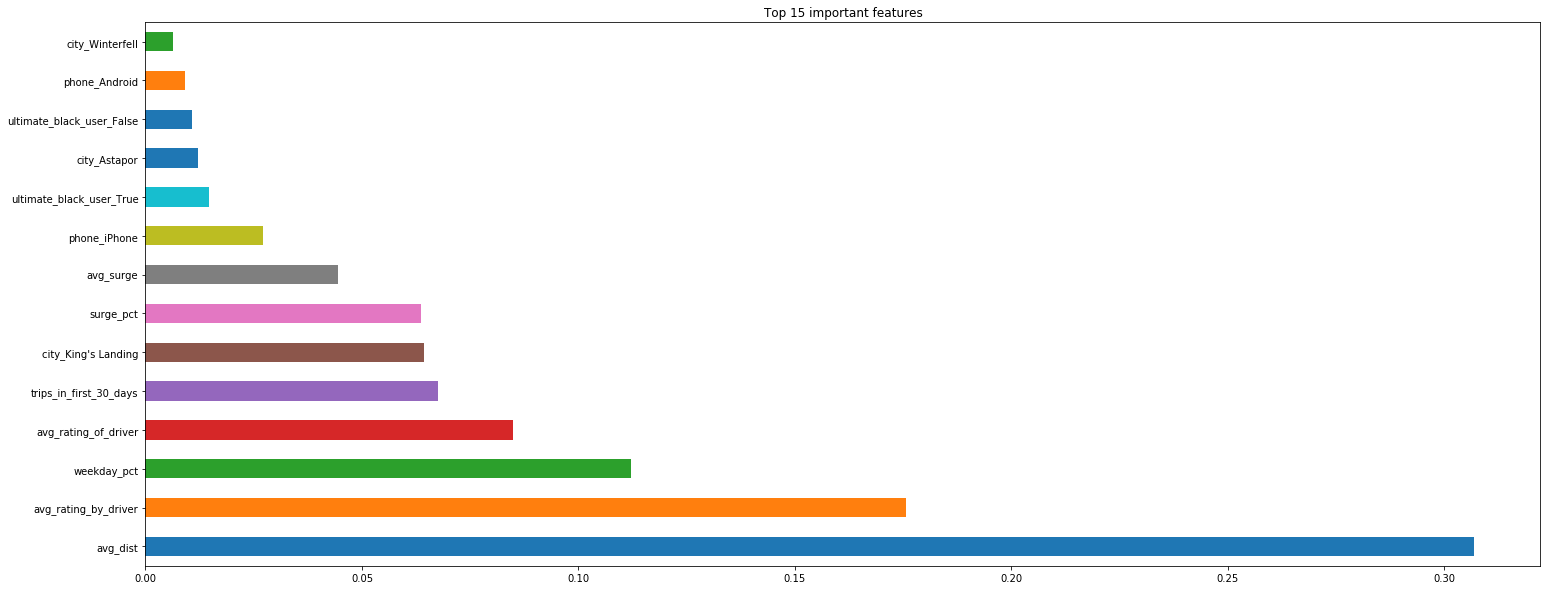

In [152]:
feat_importances = pd.Series(dtc.feature_importances_,df_encoded.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

In [154]:
importances = list(zip(dtc.feature_importances_, df_encoded.columns))
importances.sort(reverse=True)

print(importances)

[(0.30683760152469997, 'avg_dist'), (0.17570185910531477, 'avg_rating_by_driver'), (0.1122240918479411, 'weekday_pct'), (0.08488914175568069, 'avg_rating_of_driver'), (0.06748334562959572, 'trips_in_first_30_days'), (0.06434122796041686, "city_King's Landing"), (0.06363444797748052, 'surge_pct'), (0.04448677478916351, 'avg_surge'), (0.027116455633089752, 'phone_iPhone'), (0.014702958404843165, 'ultimate_black_user_True'), (0.01221805314669474, 'city_Astapor'), (0.010804211914029195, 'ultimate_black_user_False'), (0.009227488429627943, 'phone_Android'), (0.00633234188142197, 'city_Winterfell')]


# We achieved an accuracy score of 71.7% with Decision tree classifier.

## Lets try Random Forest classifier, another model that is used for binary classification

In [158]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
score = RF.score(X_test, y_test)
print(score)

/Users/ChrisM/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.751


In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.83      0.81      6251
         1.0       0.69      0.62      0.65      3749

    accuracy                           0.75     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.75      0.75      0.75     10000



In [163]:
cm_RF = confusion_matrix(y_test, y_pred)
print(cm_RF)

[[5247 1004]
 [1486 2263]]


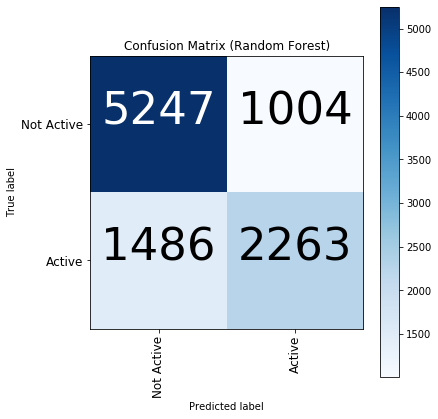

In [164]:
from itertools import *
#confusion matrix plot
def plot_confusion_matrix(y_test,y_pred, classes,
                          normalize=False,
                          title='Confusion Matrix (Random Forest)',
                          cmap=plt.cm.Blues):
   
    plt.figure(figsize = (6,6))
    plt.imshow(cm_RF, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90,size = 12)
    plt.yticks(tick_marks, classes,size = 12)
    plt.ylim([1.5, -.5])
    
    thresh = cm_RF.max() / 2.
    
    
    for i in range (cm_RF.shape[0]):
        for j in range (cm_RF.shape[1]):
            
            plt.text(j, i, cm_RF[i, j],fontsize=45,
                 horizontalalignment="center",
                 color="white" if cm_LR[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
dict_characters = {0: 'Not Active', 1: 'Active'}    
plot_confusion_matrix(y_test,y_pred, classes = list(dict_characters.values())) 
plt.show()

# Increased our performance all across the board! 

In [116]:
feature_importances = RF.feature_importances_.tolist()

In [125]:
print(feature_importances)

[0.3003449062746755, 0.10791563145724514, 0.079852887825519, 0.07888885477188624, 0.06210897443277784, 0.08046208984768916, 0.14257327061637332, 0.013522096668112504, 0.050911006419372254, 0.010854388390781816, 0.019975476974301715, 0.020624144188644267, 0.01382707120946467, 0.01813920092315661]


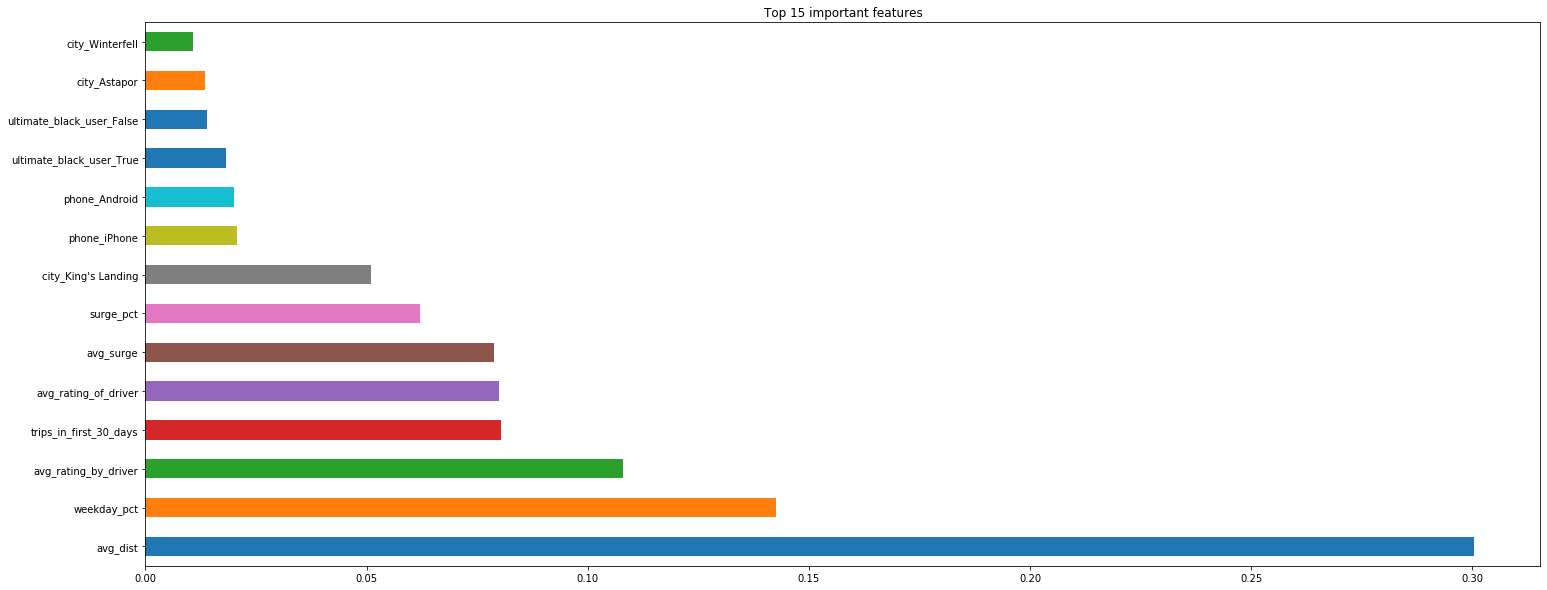

In [148]:
feat_importances = pd.Series(RF.feature_importances_,df_encoded.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 important features")
plt.show()

In [165]:
#features correlated with retention
retained = pd.DataFrame(y)
retained.columns = ['Active']
pd.concat([df_encoded, retained],
          axis=1).corr().iloc[14].sort_values(
    ascending=False)

Active                       1.000000
city_King's Landing          0.262284
phone_iPhone                 0.225464
trips_in_first_30_days       0.210463
ultimate_black_user_True     0.205002
surge_pct                    0.011797
weekday_pct                  0.009693
avg_surge                   -0.003333
avg_rating_of_driver        -0.010829
avg_rating_by_driver        -0.026748
city_Winterfell             -0.046611
avg_dist                    -0.092780
city_Astapor                -0.174655
ultimate_black_user_False   -0.205002
phone_Android               -0.225464
Name: Active, dtype: float64

# Both models used average distance as its most important feature. The feature that is correlated to retaining users are users in the city of kings landing,iPhone users, and high trips in first 30 days. 

## The next step would be to take a closer into these features.

## Look into why the city of kings Landing retains users

## Why do iPhone users stay and Andriod users dont? is it due to issues with the app service on andriod? 

## High trips within the first 30 days could be due to incentives that were given for new riders